In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math


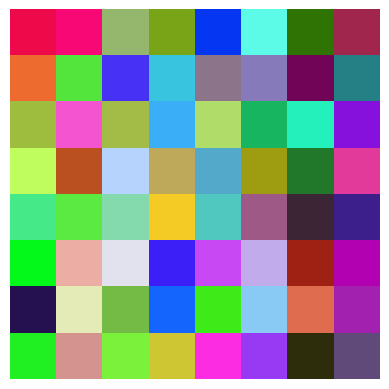

In [3]:
W = H = 64 # Размер текстуры равен H * W
img1 = np.zeros((H, W, 3), dtype = 'uint8')
d = 8
for i in range(0, H, d):
    for j in range(0, W, d):
        color = np.random.randint(0, 256, size=3)  # Генерация случайного цвета
        for x in range(d):
            for y in range(d):
                img1[i+x, j+y] = color
   
plt.axis('off')
plt.imshow(img1)
plt.show()


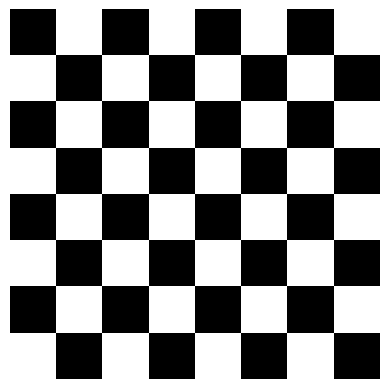

In [4]:
W = H = 64 # Размер текстуры равен H * W
img2 = np.zeros((H, W, 3), dtype = 'uint8')
d = 8
s = W // d
for i in range(H): # Генерация черно-белой карты текстуры
    for j in range(W):
        clr = (i & s ^ j & s) * s
        img2[i, j] = clr if clr == 0 else clr + 191
plt.axis('off')
plt.imshow(img2)
plt.show()


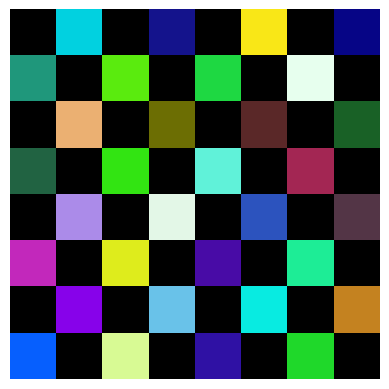

In [5]:
W = H = 64  # Размер текстуры равен H * W
img3 = np.zeros((H, W, 3), dtype='uint8')
d = 8
s = W // d
for i in range(0, H,d):
    for j in range(0, W,d):
        clr = (i & s ^ j & s) * s
        if clr == 0:
            color = (0,0,0)
        else:
            color = np.random.randint(1, 256, size=3)
        img3[i:i+d, j:j+d] = color

plt.axis('off')
plt.imshow(img3)
plt.show()


800
1200


(-0.5, 1199.5, 799.5, -0.5)

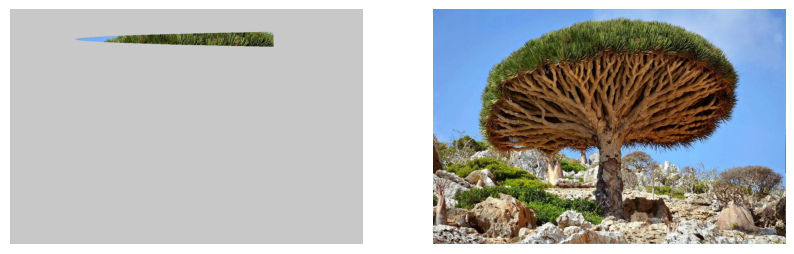

In [6]:
# Определение текстуры
texture = np.array(Image.open('tree_lab5.png'))
W = texture.shape[1]
H = texture.shape[0]
bg_clr = (200,200,200)
vp = np.full((H, W, 3), bg_clr, dtype = 'uint8')
vp1 = np.full((H, W, 3), bg_clr, dtype = 'uint8')
k = 0
# Определение координат текстуры
def texture_coordinates(x, y):
    return x % texture.shape[1], y % texture.shape[0]

# Наложение текстуры
def texture_mapping(x, y):
    u, v = texture_coordinates(x, y)
    return texture[int(v), int(u)]

a,b = np.random. randint(500,700, size  = 2)
y_0= np.random.randint(50, H-a) # физический у     
x_0= np.random.randint(50, W-b)
# Создание прямоугольного блока
x = np.linspace(0, 1200, texture.shape[1])
y = np.linspace(0, 800, texture.shape[0])

X, Y = np.meshgrid(x, y)

arr =[]
print(X.shape[0])
print(X.shape[1])
n=0
# Наложение текстуры
#Вбок 

if k==0:
    i = 0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[k, j] = texture_mapping(X[k, j], Y[k, j])
                arr.append([k,j])
        i += 1
        n = i*i
#Вниз
if k==1:
    i = 0
    n=0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[j, k] = texture_mapping(X[j, k], Y[j, k])
                arr.append([j,k])
        i += 1
        n = i*i

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vp1[i, j] = texture_mapping(X[i, j], Y[i, j])

    
        

# Визуализация результатов
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(vp1)
axs[1].axis('off')
        


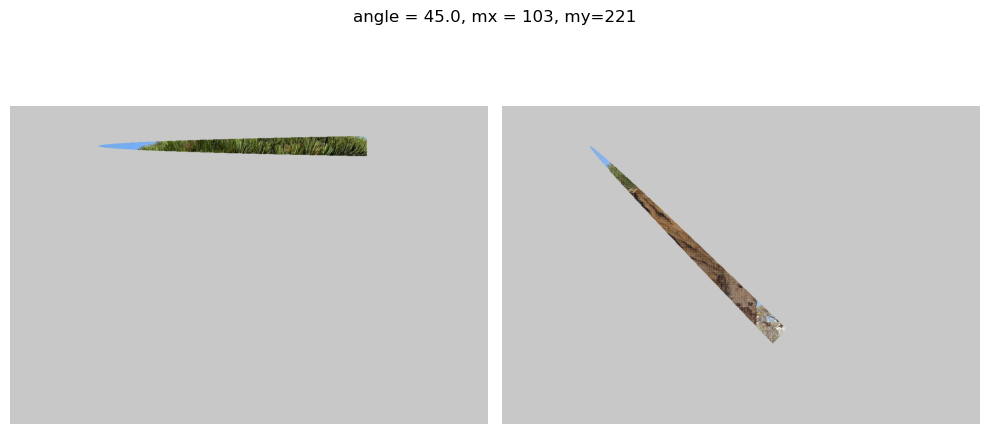

In [7]:
vp1 = np.full((H, W, 3), bg_clr, dtype = 'uint8')

mu= -y_0
lambd  = -x_0

fi = (np.pi)/4

C=[]
for i in range(len(arr)):
    C.append([arr[i][0], arr[i][1], 1])
    
R = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([ mu ,lambd ,1]) ])     
R1 = np.array([np.array([ -np.sin(fi), np.cos(fi) , 0]) ,np.array([np.cos(fi), np.sin(fi) ,  0]) , np.array([0 , 0  ,1]) ])
R2 = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([-mu , -lambd,1]) ])  
    
C1 = np.dot(C, R)
C1 = np.dot(C1, R1)
C1 = np.dot(C1, R2)

for i in range(len(C)):
    vp1[int(C1[i][0]),int(C1[i][1])] = texture_mapping(X[int(C1[i][0]),int(C1[i][1])], Y[int(C1[i][0]),int(C1[i][1])])

# Визуализация результатов
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(vp1)
axs[1].axis('off')

plt.suptitle(f"angle = {round(math.degrees(fi),4)}, mx = {-mu}, my={-lambd}")
plt.tight_layout()


800
1200


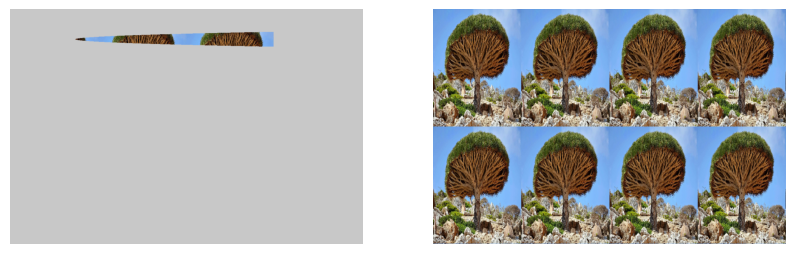

In [8]:
tx = np.random.randint(2,5)
ty = np.random.randint(2,5)
k=0
# Создание прямоугольного блока
x = np.linspace(0, 1200*tx, texture.shape[1])
y = np.linspace(0, 800*ty, texture.shape[0])

X, Y = np.meshgrid(x, y)

arr =[]
print(X.shape[0])
print(X.shape[1])
n=0
# Наложение текстуры
#Вбок 

if k==0:
    i = 0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[k, j] = texture_mapping(X[k, j], Y[k, j])
                arr.append([k,j])
        i += 1
        n = i*i
#Вниз
if k==1:
    i = 0
    n=0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[j, k] = texture_mapping(X[j, k], Y[j, k])
                arr.append([j,k])
        i += 1
        n = i*i

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vp1[i, j] = texture_mapping(X[i, j], Y[i, j])

    
        

# Визуализация результатов
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(vp1)
axs[1].axis('off')
# plt.imshow(colors[0:60, 0:10, :], cmap='gray')
plt.show()


64
64


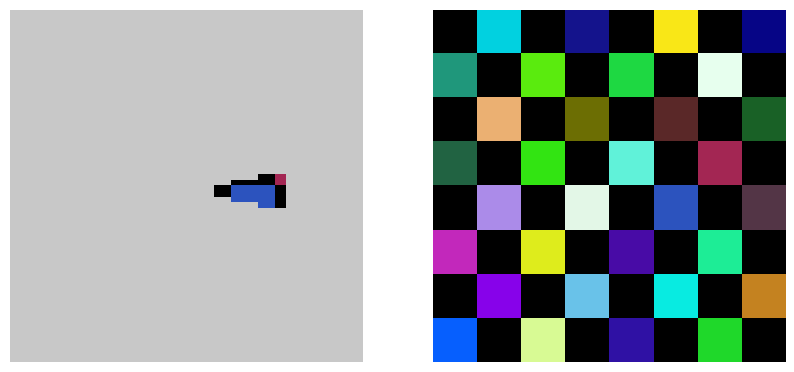

In [9]:
# Определение текстуры
texture = img3
W = texture.shape[1]
H = texture.shape[0]
bg_clr = (200,200,200)
vp = np.full((H, W, 3), bg_clr, dtype = 'uint8')
k = 0
# Определение координат текстуры
def texture_coordinates(x, y):
    return x % texture.shape[1], y % texture.shape[0]

# Наложение текстуры
def texture_mapping(x, y):
    u, v = texture_coordinates(x, y)
    return texture[int(v), int(u)]

a,b = np.random. randint(10,20, size  = 2)
# a,b = np.random. randint(10,20, size  = 2)
y_0= np.random.randint(5, H-a) # физический у     
x_0= np.random.randint(5, W-b)
# Создание прямоугольного блока
x = np.linspace(0, 64, texture.shape[1])
y = np.linspace(0, 64, texture.shape[0])

X, Y = np.meshgrid(x, y)
arr=[]

print(X.shape[0])
print(X.shape[1])

if k==0:
    n=0
    # Наложение текстуры 
    i = 0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[k, j] = texture_mapping(X[k, j], Y[k, j])
                arr.append([k,j])
        i += 1
        n = i*i
        
if k==1:
    i = 0
    n=0
    while i < b:
        for j in range(-y_0-b, -y_0-n):
            for k in range(x_0-i, x_0+i):
                vp[j, k] = texture_mapping(X[j, k], Y[j, k])
                arr.append([k,j])
        i += 1
        n = i*i

 
        
# Визуализация результатов
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(img3)
axs[1].axis('off')

# plt.imshow(colors[0:60, 0:10, :], cmap='gray')
plt.show()


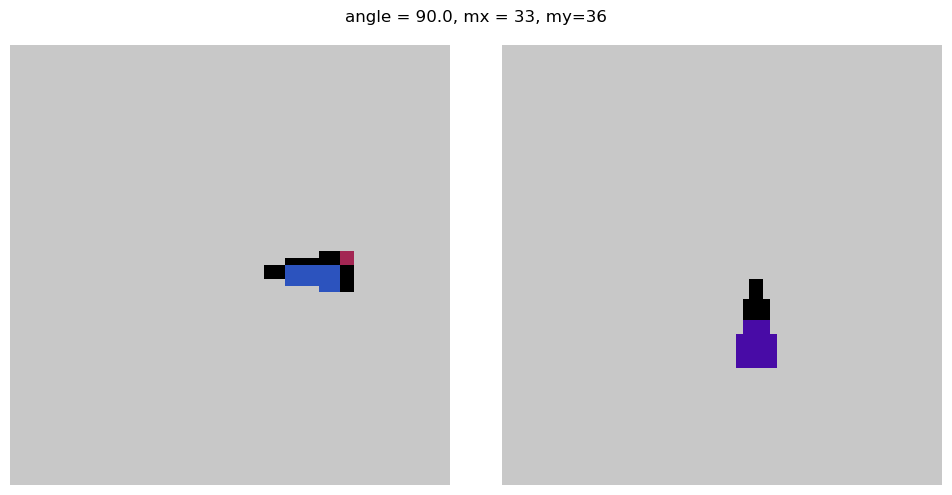

In [10]:
vp1 = np.full((H, W, 3), bg_clr, dtype = 'uint8')

mu= -y_0
lambd  = -x_0

fi = (np.pi)/2

C=[]
for i in range(len(arr)):
    C.append([arr[i][0], arr[i][1], 1])
    

R = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([ mu ,lambd ,1]) ])     
R1 = np.array([np.array([ np.cos(fi),-np.sin(fi) , 0]) ,np.array([np.sin(fi),  np.cos(fi),  0]) , np.array([0 , 0  ,1]) ])
R2 = np.array([np.array([1,0,0]) ,np.array([0, 1,0]) , np.array([-mu , -lambd,1]) ])  
    
C1 = np.dot(C, R)
C1 = np.dot(C1, R1)
C1 = np.dot(C1, R2)

for i in range(len(C)):
    vp1[int(C1[i][0]),int(C1[i][1])] = texture_mapping(X[int(C1[i][0]),int(C1[i][1])], Y[int(C1[i][0]),int(C1[i][1])])

# Визуализация результатов
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(vp1)
axs[1].axis('off')
plt.suptitle(f"angle = {round(math.degrees(fi),4)}, mx = {-mu}, my={-lambd}")
plt.tight_layout()


64
64


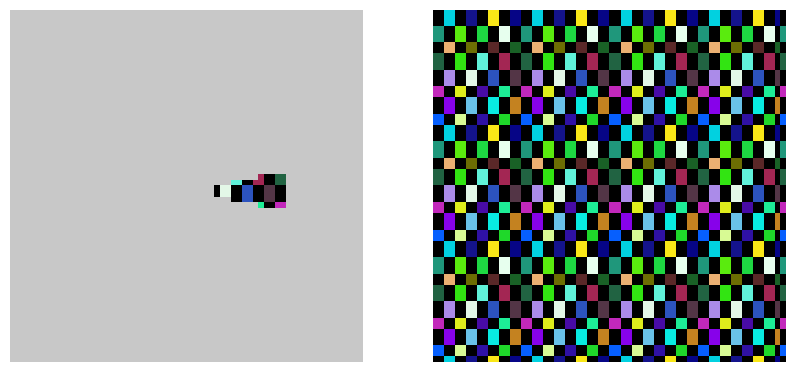

In [11]:
tx = np.random.randint(2,5)
ty = np.random.randint(2,5)
k=0
# Создание прямоугольного блока
x = np.linspace(0, 64*tx, texture.shape[1])
y = np.linspace(0, 64*ty, texture.shape[0])

X, Y = np.meshgrid(x, y)

arr =[]
print(X.shape[0])
print(X.shape[1])
n=0
# Наложение текстуры
#Вбок 

if k==0:
    i = 0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[k, j] = texture_mapping(X[k, j], Y[k, j])
                arr.append([k,j])
        i += 1
        n = i*i
#Вниз
if k==1:
    i = 0
    n=0
    while i < b:
        for j in range(x_0+n, x_0+b):
            for k in range(y_0-i, y_0+i):
                vp[j, k] = texture_mapping(X[j, k], Y[j, k])
                arr.append([j,k])
        i += 1
        n = i*i

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vp1[i, j] = texture_mapping(X[i, j], Y[i, j])

    
        

# Визуализация результатов
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(vp)
axs[0].axis('off')

axs[1].imshow(vp1)
axs[1].axis('off')
# plt.imshow(colors[0:60, 0:10, :], cmap='gray')
plt.show()


bump mapping — к цветовой текстуре применяется одноканальная (черно-белая) карта высот и источник света, которые формируют эффект впадин и выпуклостей за счет различного освещения отдельных участков; 


normal mapping — в технологии рельефность текстуры достигается за счет цветной карты нормалей, RGB-каналы которой преобразуются в три координаты вектора, по которому рассчитывается освещенность поверхности;


parallax mapping — этот способ заключается в изменении координат отдельных пикселей текстуры, а также освещении с учетом рельефа по карте нормалей, что позволяет достичь максимально полной рельефности поверхности;


MIP-текстурирование — это наложение нескольких копий одной и той же текстуры с разным разрешением в зависимости от мощности видеокарты, близости виртуального объекта к наблюдателю и других факторов.

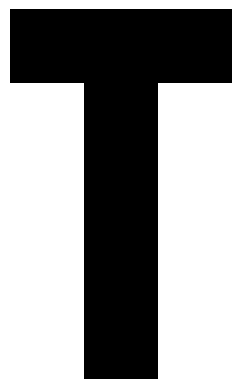

In [12]:
letter_T = [
[1, 1, 1],
[0, 1, 0],
[0, 1, 0],
[0, 1, 0],
[0, 1, 0]
]

plt.imshow(letter_T, cmap='binary')
plt.axis('off')
plt.show()